### K-Means Clustering

In [68]:
import pandas as pd
train = pd.read_csv("train_cleaned.csv")

In [253]:
from sklearn.utils import resample
df_sample = resample(train, replace=False, n_samples=100000, random_state=42)    
print(df_sample.shape)

(100000, 33)


In [254]:
df_sample = df_sample.drop(columns=['Unnamed: 0', 'site_name', 'date_time' ])

In [130]:
test = pd.read_csv("test.csv")

In [176]:
dest = pd.read_csv("destinations.csv")

Text(0.5, 0, 'Hotel cluster')

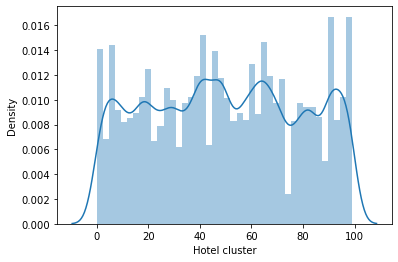

In [252]:
# Plot target label distribution of random resampling
sns.distplot(df['hotel_cluster'])
plt.ylabel('Density')
plt.xlabel('Hotel cluster')

In [256]:
print(df_sample.shape)
print(df_sample.columns)
print(df_sample.head())

(100000, 30)
Index(['user_location_country', 'user_location_region', 'user_location_city',
       'is_package', 'channel', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'imputed_distance', 'srch_before_ci', 'srch_trip_duration',
       'day_of_year_srch', 'encoded_day_of_year_srch',
       'srch_destination_type_id_0', 'srch_destination_type_id_1',
       'srch_destination_type_id_2', 'srch_destination_type_id_3',
       'srch_destination_type_id_4', 'srch_destination_type_id_5',
       'srch_destination_type_id_6', 'srch_destination_type_id_7',
       'srch_destination_type_id_8', 'srch_destination_type_id_9'],
      dtype='object')
         user_location_country  user_location_region  user_location_city  \
103686                0.082413              0.088094            0.086757   
3346208               0.082413              0.081872           

In [257]:
X = df_sample.drop(['hotel_cluster'], axis=1)
Y = df_sample['hotel_cluster']

In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train.shape

(75000, 29)

In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

pca18 = PCA(n_components = 18)
pca10 = PCA(n_components = 10)
pca5 = PCA(n_components = 5)

X_18pca = pca18.fit_transform(X)
X_10pca = pca10.fit_transform(X)
X_5pca = pca5.fit_transform(X)

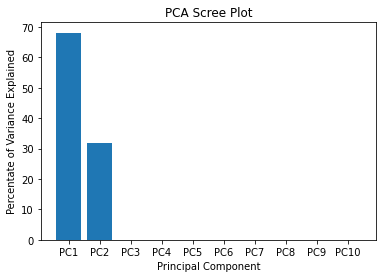

In [260]:
percent_variance = np.round(pca18.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7' , 'PC8', 'PC9', 'PC10']
plt.bar(x= range(1,11), height=percent_variance[0:10], tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [262]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, accuracy_score

#reference: https://stackoverflow.com/questions/63303682/sklearn-multiclass-roc-auc-score
def roc_auc(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred)

### Hyper-parameter Tuning

In [292]:
n_clusters= [100, 200, 300]
max_iter = [500, 1000, 1500]
tol = [0.01, 0.0001, 0.000001]
hyperparam_kmeans_acc=[]
hyperparam_kmeans_auc=[]

for c in n_clusters:
    l1=[]
    l4 = []
    for iter1 in max_iter:
        l2=[]
        l3 = []
        for t in tol:
            kmeans = KMeans(n_clusters=c, max_iter = iter1, tol = t)
            kmeans.fit(X_train, y_train)
            #scores = cross_val_score(kmeans,X_test, y_test, cv = 2)
            #accuracy1 = np.mean(scores)
            y_pred = kmeans.predict(X_test)
            accuracy1 = accuracy_score(y_test, y_pred)
            l2.append(accuracy1)
            auc1 = roc_auc(y_test, y_pred)
            l3.append(auc1)
            print("n_clusters: ",c,"\tmax_iter: ",iter1,"\t tol: ",t,"\tAccuracy: ",accuracy1,"\tAUC: ",auc1)
        l1.append(l2)
        l4.append(l3)
    hyperparam_kmeans_acc.append(l1)
    hyperparam_kmeans_auc.append(l1)

n_clusters:  100 	max_iter:  500 	 tol:  0.01 	Accuracy:  0.01364 	AUC:  0.5020134604666772
n_clusters:  100 	max_iter:  500 	 tol:  0.0001 	Accuracy:  0.00928 	AUC:  0.49981011884830956
n_clusters:  100 	max_iter:  500 	 tol:  1e-06 	Accuracy:  0.01072 	AUC:  0.4997605455818224
n_clusters:  100 	max_iter:  1000 	 tol:  0.01 	Accuracy:  0.00944 	AUC:  0.5000427936802011
n_clusters:  100 	max_iter:  1000 	 tol:  0.0001 	Accuracy:  0.00892 	AUC:  0.4997162235393885
n_clusters:  100 	max_iter:  1000 	 tol:  1e-06 	Accuracy:  0.0092 	AUC:  0.49970770772717027
n_clusters:  100 	max_iter:  1500 	 tol:  0.01 	Accuracy:  0.00864 	AUC:  0.4998706158027468
n_clusters:  100 	max_iter:  1500 	 tol:  0.0001 	Accuracy:  0.00968 	AUC:  0.49988184744535874
n_clusters:  100 	max_iter:  1500 	 tol:  1e-06 	Accuracy:  0.0106 	AUC:  0.4999263607024541
n_clusters:  200 	max_iter:  500 	 tol:  0.01 	Accuracy:  0.006 	AUC:  0.5001438190359319
n_clusters:  200 	max_iter:  500 	 tol:  0.0001 	Accuracy:  0.0045

In [293]:
max1=hyperparam_kmeans_auc[0][0][0]
for i in range(len(hyperparam_kmeans_auc)):
    for j in range(len(hyperparam_kmeans_auc[i])):
        for k in range(len(hyperparam_kmeans_auc[i][j])):
            if(hyperparam_kmeans_auc[i][j][k] >= max1):
                max1= hyperparam_kmeans_auc[i][j][k]
                c = i
                iter1 =j
                t = k
                
print("\nBest n_clusters: ", n_clusters[c])
print("\nBest max_iter: ", max_iter[iter1])
print("\nBest tol: ", tol[t])


Best n_clusters:  100

Best max_iter:  500

Best tol:  0.01


In [297]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters[c], max_iter = max_iter[iter1], tol = tol[t])
kmeans.fit(X_train, y_train)

KMeans(max_iter=500, n_clusters=100, tol=0.01)

In [300]:
y_pred = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy', accuracy)
auc = roc_auc(y_test, y_pred)
print('AUC', auc)
print("Centroids: \n", centroids)

Accuracy 0.011
AUC 0.5001431565014238
Centroids: 
 [[ 7.82310515e-02  7.69349088e-02  7.64828031e-02 ...  1.36798906e-03
  -9.97465999e-18  0.00000000e+00]
 [ 8.23377513e-02  8.06652890e-02  8.01787535e-02 ... -6.77626358e-19
   1.90819582e-17  0.00000000e+00]
 [ 7.85351962e-02  7.87900455e-02  8.10983168e-02 ...  6.32911392e-03
   3.46944695e-18  0.00000000e+00]
 ...
 [ 8.21702441e-02  8.21160914e-02  8.25428574e-02 ... -6.50521303e-19
   9.97465999e-18  0.00000000e+00]
 [ 8.16218015e-02  8.21606764e-02  8.28996969e-02 ...  2.71050543e-20
   3.03576608e-18  0.00000000e+00]
 [ 8.23104946e-02  8.37891164e-02  8.40683628e-02 ... -3.11708125e-19
   1.30104261e-18  0.00000000e+00]]


In [269]:
from sklearn.linear_model import LogisticRegression
clf = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(multi_class='ovr'))
np.mean(cross_val_score(clf, X_train, y_train, cv=5))

0.07912

In [270]:
target = [[l] for l in y_test]
pred = [[l] for l in y_pred]

In [271]:
import ml_metrics as metrics
metrics.mapk(target, pred, k=5)

0.01116